In [1]:
#IMPORT lib(s)
import matplotlib.pyplot as plt
import random
import os
import matplotlib.image as mpimg
import cv2
import numpy as np
import math

In [2]:
from tensorflow.keras.models import load_model

In [3]:
model=load_model(r'C:\Users\Lenovo\nn_calculator_project\calculator7.h5')

In [4]:
#IMPORTANT
def resize_img(img,imgh,imgw):
    imgsize=80
    imgwhite=np.ones((imgsize,imgsize,3),np.uint8)*255
    aspectRation=imgh/imgw
    if aspectRation>1:
        k=imgsize/imgh
        #print(k)
        wcal=math.floor(k*imgw)
        #print(wcal)
        imgresize=cv2.resize(img,(wcal,imgsize))
        #plt.matshow(imgresize)
        imgw=imgresize.shape[1]
        imgh=imgresize.shape[0]
        wgap=math.floor((imgsize-wcal)/2)
        imgwhite[:,wgap:wcal+wgap]=imgresize

    else:
        k=imgsize/imgw
        hcal=math.floor(k*imgh)
        imgresize=cv2.resize(img,(imgsize,hcal))
        imgw=imgresize.shape[1]
        imgh=imgresize.shape[0]
        hgap=math.floor((imgsize-hcal)/2)
        imgwhite[hgap:hcal+hgap,:]=imgresize
    return imgwhite

In [5]:
def load_img(a,b):
    x=[]
    for i in range(1201):     #len(os.listdir(r'D:\Sign Language for Numbers\0'))):
        img=cv2.imread(r"D:\Signdataset\test\\"+str(a)+"\\"+str(b)+"_"+str(i)+".jpg")
        
        try:
            if img!=None:
                imgw=img.shape[1]
                imgh=img.shape[0]
                #calling the function resize_img
                img=resize_img(img,imgh,imgw)
                x.append(img)
        except:
            imgw=img.shape[1]
            imgh=img.shape[0]
            img=resize_img(img,imgh,imgw)
            x.append(img)
    return x
#file names
numbers=['zero','one','two','three','four','five','six','seven','eight','nine','sum','sub','mul','div','equ','back']
#train dataset
train=[]
#for 0 to 15
for i in range(16):
    x=load_img(i,numbers[i])   #foldername, filename
    train.extend(x)

In [6]:
#converting list to array
train=np.array(train)
#normalization
train=train/255

In [7]:
train.shape

(19200, 80, 80, 3)

In [8]:
#creating y_train dataset
y_train=[]
for i in range(0,16):
  y_train+=[[i] for _ in range(1200)]

#IMPORTANT to convert it into int_
y_train=np.array(y_train).astype(np.int_)

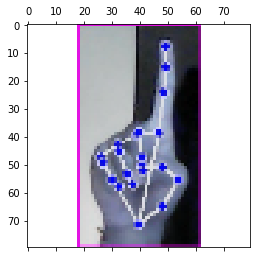

In [9]:
plt.matshow(train[1990])

In [35]:
model.evaluate(train,y_train)  #4

600/600 [==============================] - 94s 150ms/step - loss: 0.1117 - accuracy: 0.9698


[0.11174063384532928, 0.9698437452316284]

In [31]:
model.evaluate(train,y_train)  #5

600/600 [==============================] - 65s 96ms/step - loss: 0.5723 - accuracy: 0.9209


[0.5722635984420776, 0.9209374785423279]

In [33]:
model.evaluate(train,y_train)  #6

600/600 [==============================] - 132s 203ms/step - loss: 0.3140 - accuracy: 0.9168


[0.3140217959880829, 0.9167708158493042]

In [10]:
model.evaluate(train,y_train)  #7

600/600 [==============================] - 68s 100ms/step - loss: 0.1314 - accuracy: 0.9695


[0.13137806951999664, 0.969531238079071]

In [11]:
from cvzone.HandTrackingModule import HandDetector

In [12]:
import time

In [13]:
#IMPORTANT
def resize_img(img,imgh,imgw):
    imgsize=80
    imgwhite=np.ones((imgsize,imgsize,3),np.uint8)*255
    aspectRation=imgh/imgw
    if aspectRation>1:
        k=imgsize/imgh
        #print(k)
        wcal=math.ceil(k*imgw)
        #print(wcal)
        imgresize=cv2.resize(img,(wcal,imgsize))
        #plt.matshow(imgresize)
        imgw=imgresize.shape[1]
        imgh=imgresize.shape[0]
        wgap=math.ceil((imgsize-wcal)/2)
        imgwhite[:,wgap:wcal+wgap]=imgresize

    else:
        k=imgsize/imgw
        hcal=math.ceil(k*imgh)
        imgresize=cv2.resize(img,(imgsize,hcal))
        imgw=imgresize.shape[1]
        imgh=imgresize.shape[0]
        hgap=math.ceil((imgsize-hcal)/2)
        imgwhite[hgap:hcal+hgap,:]=imgresize
    return imgwhite

In [14]:
def prediction(img):
    m=resize_img(img,len(img),len(img[0]))
    m=m/255
    m=np.array([m])
    s=model.predict(m,verbose=0)
    return np.argmax(s)

In [18]:
cap=cv2.VideoCapture(0)
detector=HandDetector(maxHands=1)

offset=20
imgsize=80
prev=time.time()
k=[]
string=''
while True:
    success,img=cap.read()
    hands,img=detector.findHands(img)
    if hands:
        hand=hands[0]
        x,y,w,h=hand['bbox']
        
        imgCrop=img[y-offset:y+h+offset,x-offset:x+w+offset]
        
        cur=time.time()
        if cur-prev>3:
            prev=cur
            result=prediction(imgCrop)
            if len(string)!=0 and result==0:
                if string[len(string)-1] in ['+','-','*','/']:
                    pass
                else:
                    string+=str(result)
            elif string=='' and (result==0 or result==10 or result==11 or result==12 or result==13):
                string=''
            elif result==10:
                string+='+'
            elif result==11:
                string+='-'
            elif result==12:
                string+='*'
            elif result==13:
                string+='/'
            elif string=='' and result==15:
                string=''
            elif string!='' and result==15:  #DELETE
                string=string[:len(string)-1]
            elif string=='' and result==14:
                print("No output")
                break
            elif string!='' and result==14:
                valid=input("Enter 's' if you want to calculate or press any key to continue: ")
                if valid=='s':
                    print(eval(string))
                    break
                else:
                    pass
            else:
                string+=str(result)
            print(string)
        cv2.imshow("Imgae Crop",imgCrop)
    cv2.imshow("Imgae",img)
    cv2.waitKey(1)

4

9
98
98*
98*7
98*76
98*76-
98*76-5
98*76-54
98*76-54/
98*76-54/2
98*76-54/
98*76-54/2
98*76-54/
98*76-54/3
98*76-54/32
98*76-54/32+
98*76-54/32+1
98*76-54/32+10
Enter 's' if you want to calculate or press any key to continue: s
7456.3125


In [17]:
98*76-54/32+10

7456.3125

In [19]:
model=load_model(r'C:\Users\Lenovo\nn_calculator_project\calculator4.h5')

In [21]:
cap=cv2.VideoCapture(0)
detector=HandDetector(maxHands=1)

offset=20
imgsize=80
prev=time.time()
k=[]
string=''
while True:
    success,img=cap.read()
    hands,img=detector.findHands(img)
    if hands:
        hand=hands[0]
        x,y,w,h=hand['bbox']
        
        imgCrop=img[y-offset:y+h+offset,x-offset:x+w+offset]
        
        cur=time.time()
        if cur-prev>3:
            prev=cur
            result=prediction(imgCrop)
            if len(string)!=0 and result==0:
                if string[len(string)-1] in ['+','-','*','/']:
                    pass
                else:
                    string+=str(result)
            elif string=='' and (result==0 or result==10 or result==11 or result==12 or result==13):
                string=''
            elif result==10:
                string+='+'
            elif result==11:
                string+='-'
            elif result==12:
                string+='*'
            elif result==13:
                string+='/'
            elif string=='' and result==15:
                string=''
            elif string!='' and result==15:  #DELETE
                string=string[:len(string)-1]
            elif string=='' and result==14:
                print("No output")
                break
            elif string!='' and result==14:
                valid=input("Enter 's' if you want to calculate or press any key to continue: ")
                if valid=='s':
                    print(eval(string))
                    break
                else:
                    pass
            else:
                string+=str(result)
            print(string)
        cv2.imshow("Imgae Crop",imgCrop)
    cv2.imshow("Imgae",img)
    cv2.waitKey(1)

9
98
985
98
98*
98*6
98*
98*7
98*76
98*76-
98*76-5
98*76-54
98*76-545
98*76-54
98*76-54/
98*76-54/3
98*76-54/32
98*76-54/32+
98*76-54/32+1
98*76-54/32+10
Enter 's' if you want to calculate or press any key to continue: s
7456.3125


In [ ]:
98*76-54/32+10